# SEIR model

In [1]:
# tools needed
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# reading the file
dengue_cases = pd.read_csv('cleaned_dengue_data.csv')

### SEIR model 

In [3]:
# --- SEIR model code ---
def seir_model(y, t, beta, sigma, gamma, N):
    """
    This function defines the system of ordinary differential equations (ODEs)
    for the SEIR model.

    y: A list containing the current values of S, E, I, and R.
    t: The current time.
    beta: The infection rate.
    sigma: The incubation rate.
    gamma: The recovery rate.
    N: The total population.
    """
    S, E, I, R = y
    dS_dt = -beta * S * I / N
    dE_dt = (beta * S * I / N) - (sigma * E)
    dI_dt = (sigma * E) - (gamma * I)
    dR_dt = gamma * I

    return [dS_dt, dE_dt, dI_dt, dR_dt]

In [4]:
# standard ode
def standard_ode():
    # I (Infected): The number of new cases per month is a good proxy for the infected population.
    I0 = dengue_cases['New_cases'].iloc[-1]

    # N (Total Population): We can use the 'Total_Population' column from the data.
    N = dengue_cases['Total_Population'].iloc[-1]

    # R (Recovered): The cumulative number of cases is a good proxy for the recovered population.
    R0 = dengue_cases['Total_cases'].iloc[-1]

    # E (Exposed): The number of exposed individuals is tricky to get from raw data.
    E0 = 458

    # S (Susceptible): This is the remaining population that has not been infected, exposed, or recovered.
    # S = N - E - I - R
    S0 = N - E0 - I0 - R0
    y0 = [S0, E0, I0, R0]


    # SEIR model parameters
    beta = 0.5  # Infection rate
    sigma = 1/5  # Incubation rate (1/incubation period, e.g., 5 days)
    gamma = 1/10 # Recovery rate (1/infectious period, e.g., 10 days)

    # Initial conditions for the model

    # A grid of time points (in days)
    t_forecast = np.linspace(0, 100, 100) # Simulate for 100 days

    # --- Run the Simulation ---
    # The odeint function solves the differential equations over the time grid.
    solution = odeint(seir_model, y0, t_forecast, args=(beta, sigma, gamma, N))
    S, E, I, R = solution.T # Transpose the solution to get S, E, I, R as separate arrays

    SEIR = pd.DataFrame({
        'S': S,
        'E': E,
        'I': I,
        'R': R
    })
    SEIR.to_csv('seir-forecast.csv', mode='w', index=False)

    # --- Plot the Results ---
    plt.figure(figsize=(10, 6))
    plt.plot(t_forecast, S, label='Susceptible')
    plt.plot(t_forecast, E, label='Exposed')
    plt.plot(t_forecast, I, label='Infectious')
    plt.plot(t_forecast, R, label='Recovered')
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Individuals')
    plt.title('SEIR Model Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()


### Forecast visualization

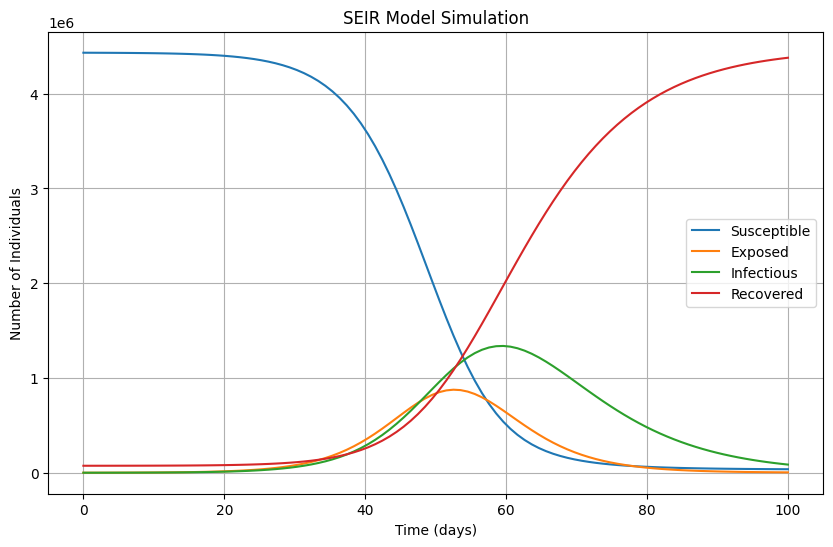

In [5]:
if __name__ == '__main__':
    standard_ode()